<a href="https://colab.research.google.com/github/lalit1511/SQL_Projects/blob/main/SQL_Brazilian_E_Commerce_Public_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

customers = pd.read_csv('olist_customers_dataset.csv', sep=',', on_bad_lines='skip')
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')

In [2]:
import sqlite3

conn = sqlite3.connect(':memory:')

customers.to_sql('customers', conn, index=False, if_exists='replace')
orders.to_sql('orders', conn, index=False, if_exists='replace')
order_items.to_sql('order_items', conn, index=False, if_exists='replace')
products.to_sql('products', conn, index=False, if_exists='replace')
sellers.to_sql('sellers', conn, index=False, if_exists='replace')
payments.to_sql('payments', conn, index=False, if_exists='replace')
reviews.to_sql('reviews', conn, index=False, if_exists='replace')
geolocation.to_sql('geolocation', conn, index=False, if_exists='replace')


826416

In [3]:
#Show All Order Statuses and Their Counts
query = """
SELECT order_status, COUNT(*) AS total_orders
FROM orders
GROUP BY order_status
ORDER BY total_orders DESC;
"""

pd.read_sql_query(query, conn)


order_status  total_orders
0    delivered         96478
1      shipped          1107
2     canceled           625
3  unavailable           609
4     invoiced           314
5   processing           301
6      created             5
7     approved             2

In [4]:
#Calculate the Average Delivery Time (Delivered Orders Only)
query = """
SELECT
    ROUND(AVG(JULIANDAY(order_delivered_customer_date) - JULIANDAY(order_purchase_timestamp)), 2) AS avg_delivery_days
FROM orders
WHERE order_status = 'delivered';
"""

pd.read_sql_query(query, conn)


avg_delivery_days
0              None

In [20]:
# Top 10 Payment Methods Used
query = """
SELECT payment_type, COUNT(*) AS total
FROM payments
GROUP BY payment_type
ORDER BY total DESC
LIMIT 10;
"""

pd.read_sql_query(query, conn)


payment_type  total
0  credit_card  76795
1       boleto  19784
2      voucher   5775
3   debit_card   1529
4  not_defined      3

In [14]:
#Top 10 Product Categories by Quantity Sold
query = """
SELECT
    p.product_category_name,
    SUM(oi.product_id IS NOT NULL) AS items_sold
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_category_name
ORDER BY items_sold DESC
LIMIT 10;
"""

pd.read_sql_query(query, conn)


product_category_name  items_sold
0         cama_mesa_banho       11115
1            beleza_saude        9670
2           esporte_lazer        8641
3        moveis_decoracao        8334
4  informatica_acessorios        7827
5   utilidades_domesticas        6964
6      relogios_presentes        5991
7               telefonia        4545
8      ferramentas_jardim        4347
9              automotivo        4235

**Section 1**

In [5]:
# Total Counts of Key Tables
# Total customers
pd.read_sql_query("SELECT COUNT(DISTINCT customer_id) AS total_customers FROM customers;", conn)


total_customers
0            99441

In [6]:
# Total sellers
pd.read_sql_query("SELECT COUNT(DISTINCT seller_id) AS total_sellers FROM sellers;", conn)


total_sellers
0           3095

In [7]:
# Total products
pd.read_sql_query("SELECT COUNT(DISTINCT product_id) AS total_products FROM products;", conn)


total_products
0           32951

In [8]:
# Total orders
pd.read_sql_query("SELECT COUNT(*) AS total_orders FROM orders;", conn)


total_orders
0         99441

In [9]:
#Order Status Distribution
pd.read_sql_query("""
SELECT order_status, COUNT(*) AS order_count
FROM orders
GROUP BY order_status
ORDER BY order_count DESC;
""", conn)


order_status  order_count
0    delivered        96478
1      shipped         1107
2     canceled          625
3  unavailable          609
4     invoiced          314
5   processing          301
6      created            5
7     approved            2

**üì¶ Section 2: Order Analysis**

In [10]:
#üìà 1. Orders per Month
pd.read_sql_query("""
SELECT
    STRFTIME('%Y-%m', order_purchase_timestamp) AS order_month,
    COUNT(*) AS total_orders
FROM orders
GROUP BY order_month
ORDER BY order_month;
""", conn)


order_month  total_orders
0        None         99441

In [11]:
#üöö 2. Average Delivery Time (in Days)
pd.read_sql_query("""
SELECT
    ROUND(AVG(JULIANDAY(order_delivered_customer_date) - JULIANDAY(order_purchase_timestamp)), 2) AS avg_delivery_days
FROM orders
WHERE order_status = 'delivered'
AND order_delivered_customer_date IS NOT NULL;
""", conn)


avg_delivery_days
0              None

In [12]:
#‚ùåüì¶ 3. Canceled Orders vs Delivered Orders
pd.read_sql_query("""
SELECT
    order_status,
    COUNT(*) AS count
FROM orders
WHERE order_status IN ('delivered', 'canceled')
GROUP BY order_status;
""", conn)


order_status  count
0     canceled    625
1    delivered  96478

In [13]:
#üìâ 4. Orders with Delayed Delivery (optional)
pd.read_sql_query("""
SELECT
    COUNT(*) AS delayed_orders
FROM orders
WHERE order_status = 'delivered'
AND order_delivered_customer_date > order_estimated_delivery_date;
""", conn)


delayed_orders
0           44261

#üõçÔ∏è Section 3: Product Performance

In [15]:
#ü•á 1. Top 10 Best-Selling Product Categories
pd.read_sql_query("""
SELECT
    p.product_category_name,
    COUNT(*) AS items_sold
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_category_name
ORDER BY items_sold DESC
LIMIT 10;
""", conn)



product_category_name  items_sold
0         cama_mesa_banho       11115
1            beleza_saude        9670
2           esporte_lazer        8641
3        moveis_decoracao        8334
4  informatica_acessorios        7827
5   utilidades_domesticas        6964
6      relogios_presentes        5991
7               telefonia        4545
8      ferramentas_jardim        4347
9              automotivo        4235

In [16]:
#üí∞ 2. Average Price by Product Category
pd.read_sql_query("""
SELECT
    p.product_category_name,
    ROUND(AVG(oi.price), 2) AS avg_price
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_category_name
ORDER BY avg_price DESC
LIMIT 10;
""", conn)


product_category_name  avg_price
0                                            pcs    1098.34
1                    portateis_casa_forno_e_cafe     624.29
2                             eletrodomesticos_2     476.12
3                      agro_industria_e_comercio     342.12
4                          instrumentos_musicais     281.62
5                                eletroportateis     280.78
6  portateis_cozinha_e_preparadores_de_alimentos     264.57
7                                 telefonia_fixa     225.69
8               construcao_ferramentas_seguranca     208.99
9                             relogios_presentes     201.14

In [17]:
#üöö 3. Average Freight Value by Product Category
pd.read_sql_query("""
SELECT
    p.product_category_name,
    ROUND(AVG(oi.freight_value), 2) AS avg_freight
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_category_name
ORDER BY avg_freight DESC
LIMIT 10;
""", conn)


product_category_name  avg_freight
0                                             pcs        48.45
1                              eletrodomesticos_2        44.54
2                       moveis_colchao_e_estofado        42.91
3  moveis_cozinha_area_de_servico_jantar_e_jardim        42.70
4                                   moveis_quarto        42.50
5                               moveis_escritorio        40.55
6                     portateis_casa_forno_e_cafe        36.16
7                                     moveis_sala        35.72
8                         sinalizacao_e_seguranca        32.70
9                   industria_comercio_e_negocios        29.42

In [18]:
#üì¶ Optional: Products with Zero Price (for data quality check)
pd.read_sql_query("""
SELECT COUNT(*) AS zero_price_items
FROM order_items
WHERE price = 0;
""", conn)


zero_price_items
0                 0

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


üìä Visuals for Product Performance

<ipython-input-20-6ad84a87b910>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories, x='items_sold', y='product_category_name', palette='viridis')


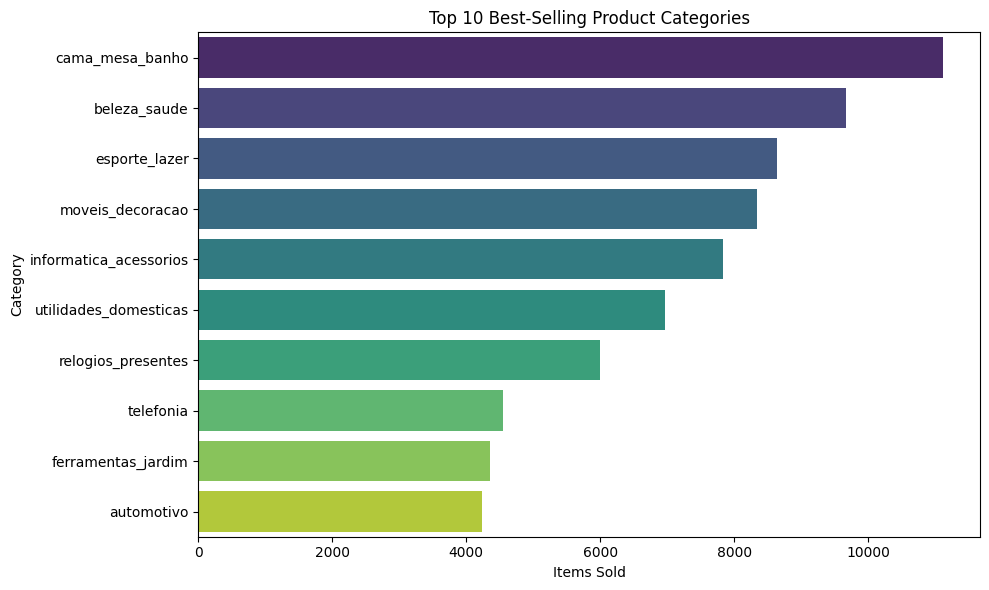

In [20]:
#üìà 1. Top 10 Best-Selling Product Categories
# Get top 10 best-selling categories
top_categories = pd.read_sql_query("""
SELECT
    p.product_category_name,
    COUNT(*) AS items_sold
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_category_name
ORDER BY items_sold DESC
LIMIT 10;
""", conn)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_categories, x='items_sold', y='product_category_name', palette='viridis')
plt.title('Top 10 Best-Selling Product Categories')
plt.xlabel('Items Sold')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


<ipython-input-21-8e15f5e1ac25>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_expensive, x='avg_price', y='product_category_name', palette='magma')


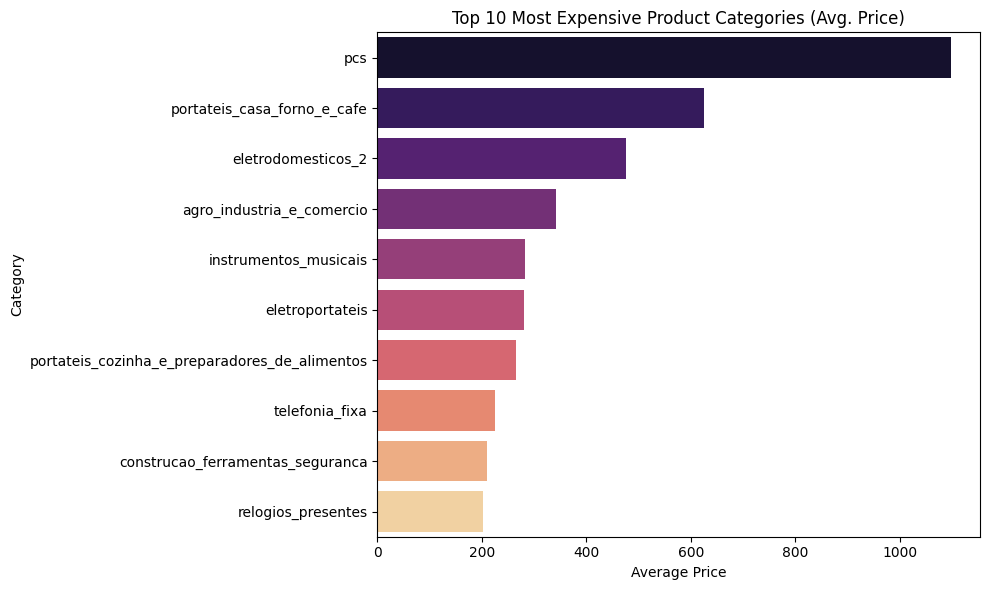

In [21]:
#üí∞ 2. Top 10 Most Expensive Product Categories (Avg. Price)
top_expensive = pd.read_sql_query("""
SELECT
    p.product_category_name,
    ROUND(AVG(oi.price), 2) AS avg_price
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_category_name
ORDER BY avg_price DESC
LIMIT 10;
""", conn)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_expensive, x='avg_price', y='product_category_name', palette='magma')
plt.title('Top 10 Most Expensive Product Categories (Avg. Price)')
plt.xlabel('Average Price')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


<ipython-input-22-380bedc4226d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_freight, x='avg_freight', y='product_category_name', palette='coolwarm')


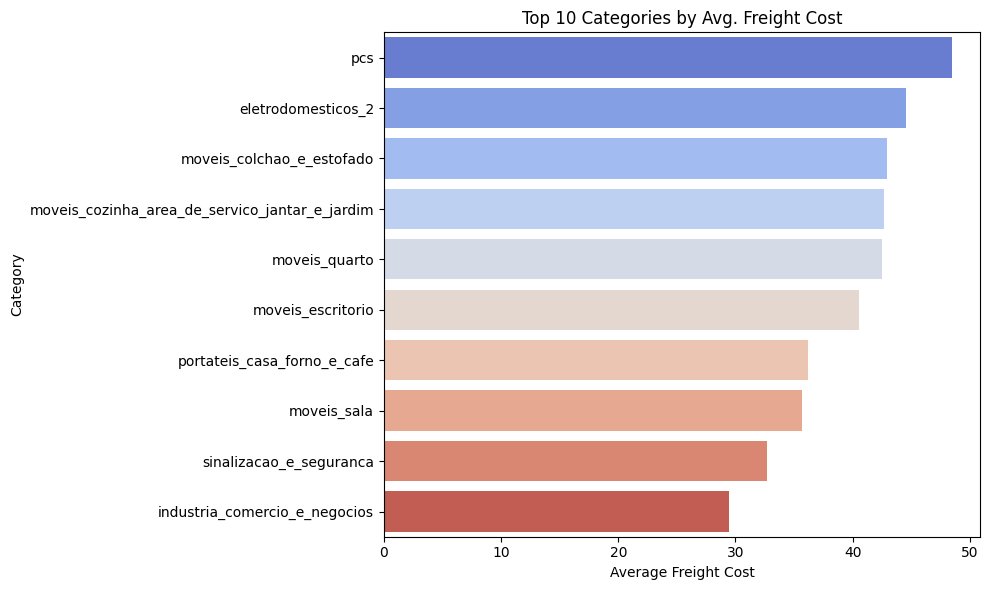

In [22]:
#üöö 3. Categories with Highest Freight Charges
top_freight = pd.read_sql_query("""
SELECT
    p.product_category_name,
    ROUND(AVG(oi.freight_value), 2) AS avg_freight
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_category_name
ORDER BY avg_freight DESC
LIMIT 10;
""", conn)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_freight, x='avg_freight', y='product_category_name', palette='coolwarm')
plt.title('Top 10 Categories by Avg. Freight Cost')
plt.xlabel('Average Freight Cost')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


**üë• Section 4: Customer Insights**


In [23]:
#üåé 1. Top 10 States with the Most Customers
pd.read_sql_query("""
SELECT
    customer_state,
    COUNT(DISTINCT customer_id) AS total_customers
FROM customers
GROUP BY customer_state
ORDER BY total_customers DESC
LIMIT 10;
""", conn)


customer_state  total_customers
0             SP            41746
1             RJ            12852
2             MG            11635
3             RS             5466
4             PR             5045
5             SC             3637
6             BA             3380
7             DF             2140
8             ES             2033
9             GO             2020

In [24]:
#üîÅ 2. Customers with Multiple Orders (Repeat Buyers)
pd.read_sql_query("""
SELECT
    COUNT(*) AS repeat_customers
FROM (
    SELECT customer_id
    FROM orders
    GROUP BY customer_id
    HAVING COUNT(order_id) > 1
);
""", conn)


repeat_customers
0                 0

In [25]:
#üì¶ 3. Average Orders per Customer (State-wise)
pd.read_sql_query("""
SELECT
    c.customer_state,
    ROUND(COUNT(o.order_id) * 1.0 / COUNT(DISTINCT c.customer_id), 2) AS avg_orders_per_customer
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_state
ORDER BY avg_orders_per_customer DESC
LIMIT 10;
""", conn)


customer_state  avg_orders_per_customer
0             TO                      1.0
1             SP                      1.0
2             SE                      1.0
3             SC                      1.0
4             RS                      1.0
5             RR                      1.0
6             RO                      1.0
7             RN                      1.0
8             RJ                      1.0
9             PR                      1.0

In [26]:
#üèôÔ∏è Optional: Top Cities by Customer Count
pd.read_sql_query("""
SELECT
    customer_city,
    COUNT(DISTINCT customer_id) AS customer_count
FROM customers
GROUP BY customer_city
ORDER BY customer_count DESC
LIMIT 10;
""", conn)


customer_city  customer_count
0              sao paulo           15540
1         rio de janeiro            6882
2         belo horizonte            2773
3               brasilia            2131
4               curitiba            1521
5               campinas            1444
6           porto alegre            1379
7               salvador            1245
8              guarulhos            1189
9  sao bernardo do campo             938

üìä Customer Insight Visualizations


<ipython-input-27-731f48d5a5ba>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x='total_customers', y='customer_state', palette='Blues_r')


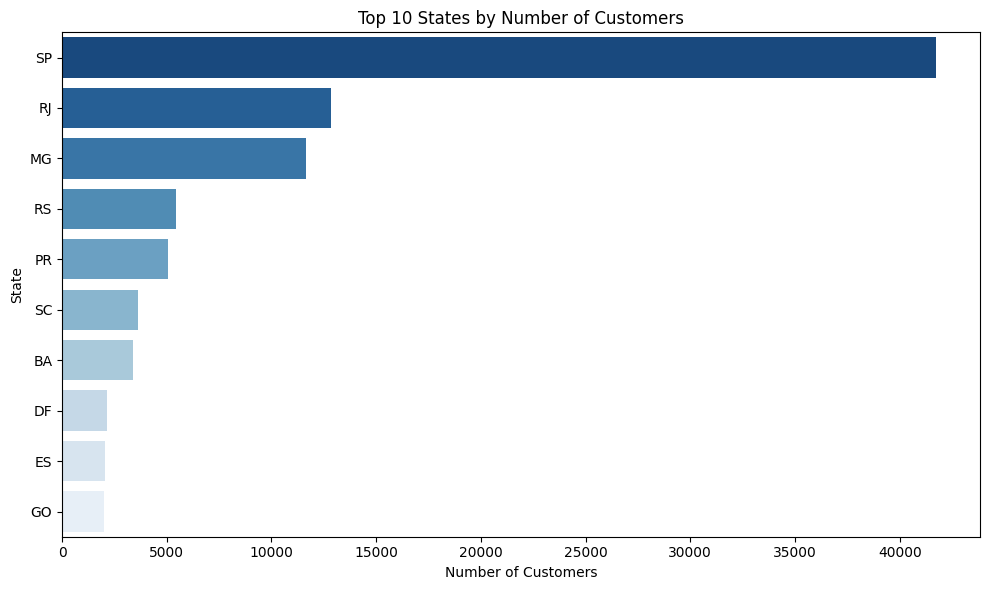

In [27]:
#üåé 1. Top 10 States by Number of Customers
top_states = pd.read_sql_query("""
SELECT
    customer_state,
    COUNT(DISTINCT customer_id) AS total_customers
FROM customers
GROUP BY customer_state
ORDER BY total_customers DESC
LIMIT 10;
""", conn)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_states, x='total_customers', y='customer_state', palette='Blues_r')
plt.title('Top 10 States by Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('State')
plt.tight_layout()
plt.show()


<ipython-input-28-6d73a0052e01>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_orders, x='avg_orders_per_customer', y='customer_state', palette='YlGnBu')


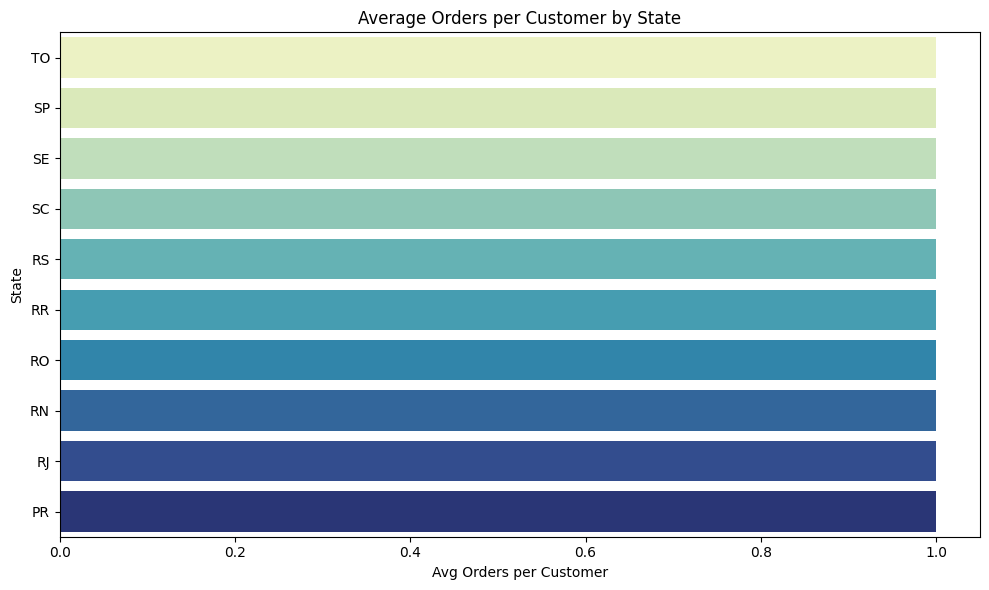

In [28]:
#üîÅ 2. Average Orders per Customer by State
avg_orders = pd.read_sql_query("""
SELECT
    c.customer_state,
    ROUND(COUNT(o.order_id) * 1.0 / COUNT(DISTINCT c.customer_id), 2) AS avg_orders_per_customer
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_state
ORDER BY avg_orders_per_customer DESC
LIMIT 10;
""", conn)

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_orders, x='avg_orders_per_customer', y='customer_state', palette='YlGnBu')
plt.title('Average Orders per Customer by State')
plt.xlabel('Avg Orders per Customer')
plt.ylabel('State')
plt.tight_layout()
plt.show()


<ipython-input-29-224aee2b6c59>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='customer_count', y='customer_city', palette='Purples')


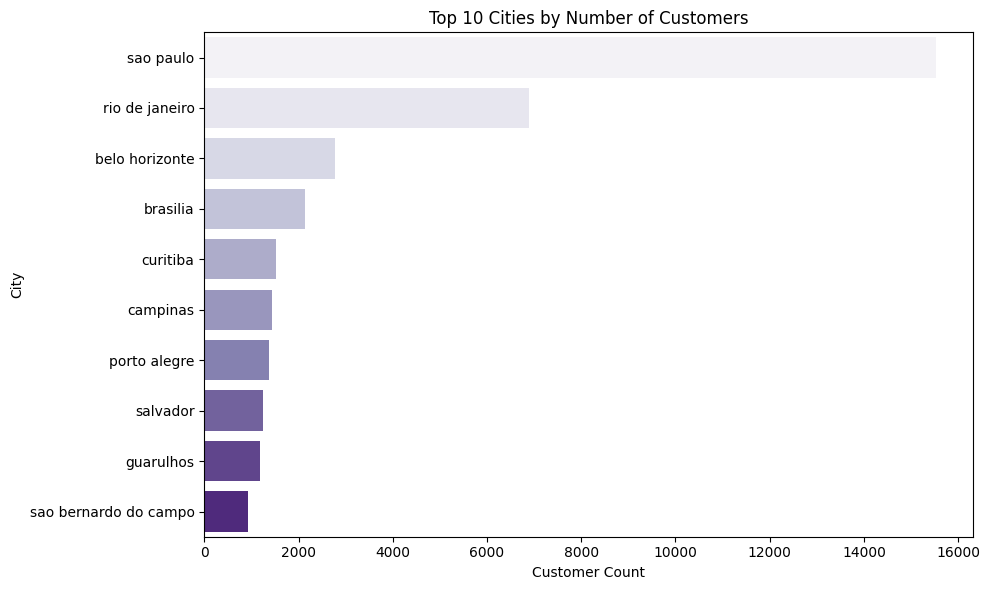

In [29]:
#üèôÔ∏è 3. Top 10 Cities by Number of Customers
top_cities = pd.read_sql_query("""
SELECT
    customer_city,
    COUNT(DISTINCT customer_id) AS customer_count
FROM customers
GROUP BY customer_city
ORDER BY customer_count DESC
LIMIT 10;
""", conn)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_cities, x='customer_count', y='customer_city', palette='Purples')
plt.title('Top 10 Cities by Number of Customers')
plt.xlabel('Customer Count')
plt.ylabel('City')
plt.tight_layout()
plt.show()



#üí≥ Section 5: Payment & Review Behavior

In [31]:
#üåü 1. Review Score Distribution
pd.read_sql_query("""
SELECT
    review_score,
    COUNT(*) AS count
FROM reviews -- Changed from order_reviews to reviews
GROUP BY review_score
ORDER BY review_score DESC;
""", conn)



review_score  count
0             5  57328
1             4  19142
2             3   8179
3             2   3151
4             1  11424

In [33]:
#üéØ 2. Average Review Score by Product Category
#üéØ 2. Average Review Score by Product Category
pd.read_sql_query("""
SELECT
    p.product_category_name,
    ROUND(AVG(r.review_score), 2) AS avg_review_score
FROM reviews r -- Changed from order_reviews to reviews
JOIN orders o ON r.order_id = o.order_id
JOIN order_items oi ON o.order_id = oi.order_id
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_category_name
ORDER BY avg_review_score DESC
LIMIT 10;
""", conn)


product_category_name  avg_review_score
0                   cds_dvds_musicais              4.64
1       fashion_roupa_infanto_juvenil              4.50
2              livros_interesse_geral              4.45
3  construcao_ferramentas_ferramentas              4.44
4                              flores              4.42
5                   livros_importados              4.40
6                     livros_tecnicos              4.37
7                    malas_acessorios              4.32
8                   alimentos_bebidas              4.32
9         portateis_casa_forno_e_cafe              4.30

<ipython-input-37-ac00d25ac9c8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=review_dist, x='review_score', y='count', palette='Set2')


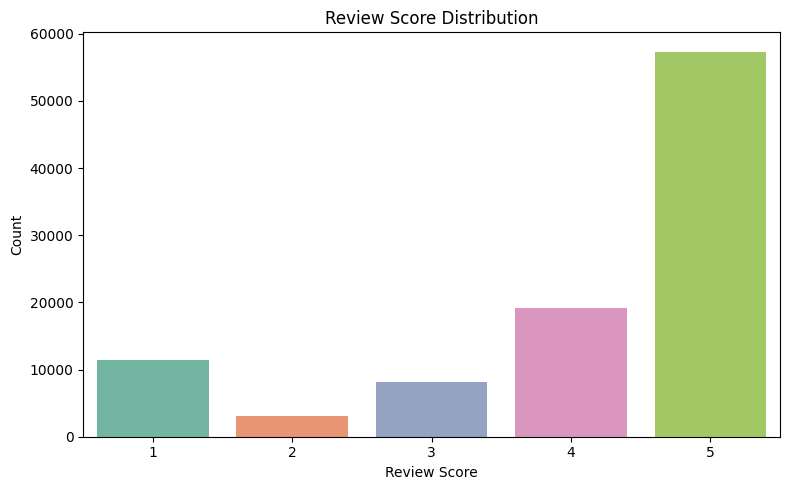

In [37]:
#üìä Review & Payment Visualizations
review_dist = pd.read_sql_query("""
SELECT
    review_score,
    COUNT(*) AS count
FROM reviews -- Corrected table name from order_reviews to reviews
GROUP BY review_score
ORDER BY review_score DESC;
""", conn)

plt.figure(figsize=(8, 5))
sns.barplot(data=review_dist, x='review_score', y='count', palette='Set2')
plt.title('Review Score Distribution')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<ipython-input-39-4212c4b21ac9>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_review_cat, y='product_category_name', x='avg_review_score', palette='coolwarm')


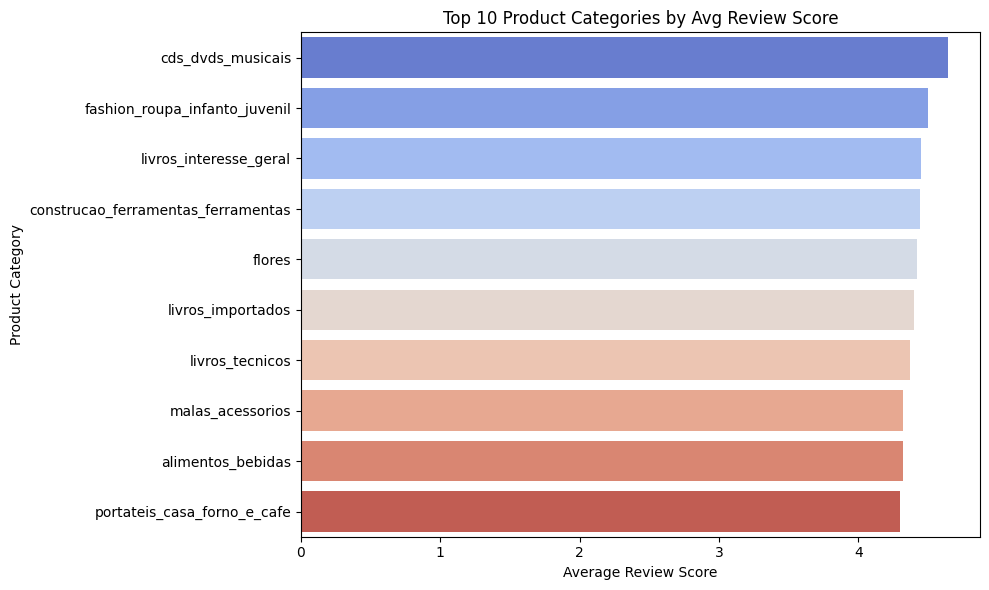

In [39]:
#üéØ 2. Average Review Score by Product Category (Top 10)
avg_review_cat = pd.read_sql_query("""
SELECT
    p.product_category_name,
    ROUND(AVG(r.review_score), 2) AS avg_review_score
FROM reviews r  -- Changed table name from order_reviews to reviews
JOIN orders o ON r.order_id = o.order_id
JOIN order_items oi ON o.order_id = oi.order_id
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_category_name
ORDER BY avg_review_score DESC
LIMIT 10;
""", conn)

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_review_cat, y='product_category_name', x='avg_review_score', palette='coolwarm')
plt.title('Top 10 Product Categories by Avg Review Score')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


<ipython-input-42-f3d025b99a8b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delay_by_review, x='review_score', y='avg_delivery_delay', palette='magma')


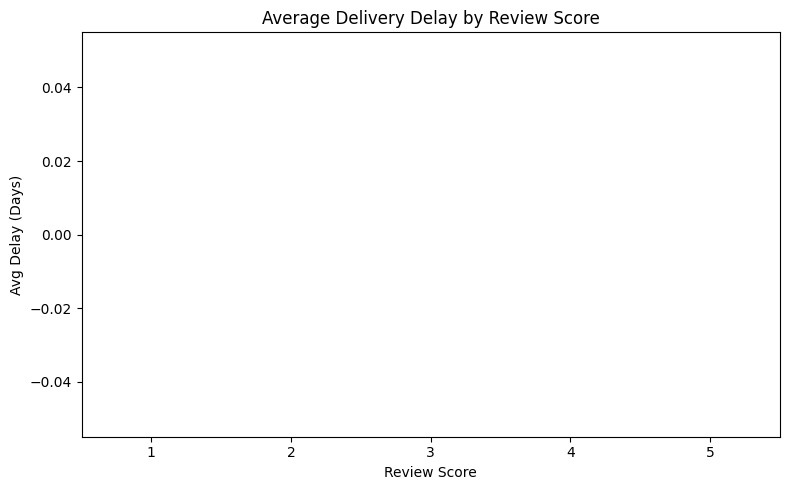

In [42]:
delay_by_review = pd.read_sql_query("""
SELECT
    r.review_score,
    ROUND(AVG(JULIANDAY(o.order_delivered_customer_date) - JULIANDAY(o.order_estimated_delivery_date)), 2) AS avg_delivery_delay
FROM reviews r
JOIN orders o ON r.order_id = o.order_id
WHERE o.order_delivered_customer_date IS NOT NULL
GROUP BY r.review_score
ORDER BY r.review_score DESC;
""", conn)

plt.figure(figsize=(8, 5))
sns.barplot(data=delay_by_review, x='review_score', y='avg_delivery_delay', palette='magma')
plt.title('Average Delivery Delay by Review Score')
plt.xlabel('Review Score')
plt.ylabel('Avg Delay (Days)')
plt.tight_layout()
plt.show()


In [41]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
pd.read_sql_query(query, conn)


name
0    customers
1       orders
2  order_items
3     products
4      sellers
5     payments
6      reviews
7  geolocation

<ipython-input-43-7a3d59216266>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_types, x='payment_type', y='count', palette='Set1')


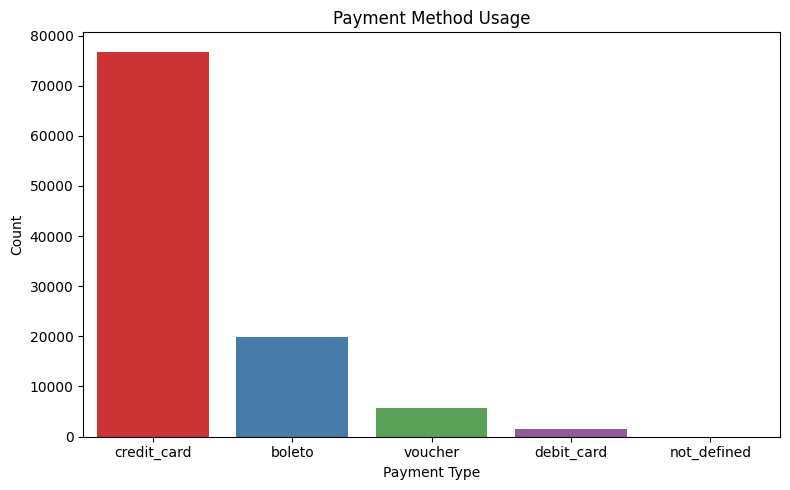

In [43]:
#üí≥ 4. Payment Method Usage
payment_types = pd.read_sql_query("""
SELECT
    payment_type,
    COUNT(*) AS count
FROM payments
GROUP BY payment_type
ORDER BY count DESC;
""", conn)

plt.figure(figsize=(8, 5))
sns.barplot(data=payment_types, x='payment_type', y='count', palette='Set1')
plt.title('Payment Method Usage')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



# üõí Brazilian E-Commerce Analysis (SQL + Python)

A complete end-to-end analysis of customer orders, sales, reviews, and payments using the Brazilian E-Commerce Public Dataset. The project was executed in Google Colab using SQLite and visualized using Seaborn and Matplotlib.

## üîß Tech Stack
- SQLite (via `sqlite3`)
- Pandas
- Seaborn, Matplotlib
- Google Colab

## üìå Objectives
- Extract business insights from sales, reviews, and payments
- Use SQL joins, aggregations, filters, and window functions
- Visualize key patterns for stakeholders

## üìä Key Analyses
- Top-selling products and categories
- Customer lifetime value
- Review score trends vs delivery performance
- Payment method distribution and installment behavior

## üìà Visualizations
- Bar charts of product revenue and top customers
- Review score distribution
- Delivery delay vs review score
- Payment method usage

## üéØ Business Value
Help e-commerce managers understand:
- What‚Äôs selling well
- Who are the best customers
- Where shipping and satisfaction need improvement
- Preferred payment options

